In [1]:
from analysis import ANALYSIS_CONFIGS
from analysis.analysis import FinancialAnalysis
from analysis.doc_utils import ReportDocument

In [2]:
ANALYSIS_CONFIGS

['all_analysis.json',
 'asset_quality_analysis.json',
 'asset_indepth_analysis.json',
 'asset_fraud_analysis.json',
 'profit_analysis.json',
 'cash_flow_analysis.json']

In [3]:
analysis = FinancialAnalysis(ANALYSIS_CONFIGS[4])
images, titles, fields = analysis.images, analysis.titles, analysis.fields

### 营业收入及增长率

In [4]:
t1 = analysis.init_table('t1')
t1['营业收入增长率'] = t1['其中：营业收入(元)'].pct_change()

analysis.format_show_table('t1')

,2015,2016,2017,2018,2019,2020
其中：营业收入(元),"4,542,718,028","5,794,897,867","7,017,397,058","7,424,885,274","7,760,581,856","8,128,620,799"
营业收入增长率,nan%,27.56%,21.10%,5.81%,4.52%,4.74%


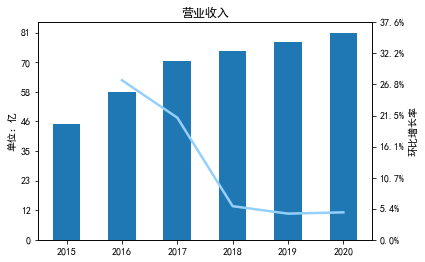

In [5]:
analysis.show_plot('t1')

### 毛利率及毛利率波动

In [6]:
t2 = analysis.init_table('t2')
t2['毛利率'] = (t2['其中：营业收入(元)'] - t2['其中：营业成本(元)']) / t2['其中：营业收入(元)']
t2['毛利率波动率'] = t2['毛利率'].pct_change()

analysis.format_show_table('t2')

,2015,2016,2017,2018,2019,2020
其中：营业收入(元),"4,542,718,028","5,794,897,867","7,017,397,058","7,424,885,274","7,760,581,856","8,128,620,799"
其中：营业成本(元),"1,899,998,300","2,474,046,300","3,250,587,700","3,450,765,200","3,548,777,700","3,563,206,900"
毛利率,58.17%,57.31%,53.68%,53.52%,54.27%,56.16%
毛利率波动率,nan%,-1.49%,-6.33%,-0.29%,1.40%,3.49%


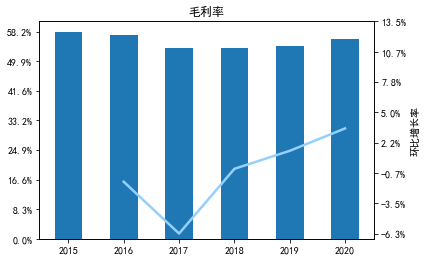

In [7]:
analysis.show_plot('t2')

### 期间费用率

In [8]:
t3 = analysis.init_table('t3')
t3.loc[t3['财务费用(元)']<0, '财务费用(元)'] = 0
t3['四费合计'] = t3.T[:4].sum()
t3['期间费用率'] = t3['四费合计'] / t3['其中：营业收入(元)']
t3['毛利率'] = t2['毛利率']
t3['期间费用率占毛利率的比率'] = t3['期间费用率'] / t3['毛利率']

analysis.format_show_table('t3')

,2015,2016,2017,2018,2019,2020
销售费用(元),"1,353,472,800","1,545,113,300","1,677,876,500","1,909,856,800","1,928,259,200","2,146,965,000"
管理费用(元),"354,268,800","449,159,300","247,834,600","272,355,100","284,364,100","296,985,800"
研发费用(元),0,0,"233,127,000","293,427,200","299,469,100","303,347,600"
财务费用(元),0,0,0,0,0,0
四费合计,"1,707,741,600","1,994,272,600","2,158,838,100","2,475,639,100","2,512,092,400","2,747,298,400"
其中：营业收入(元),"4,542,718,028","5,794,897,867","7,017,397,058","7,424,885,274","7,760,581,856","8,128,620,799"
期间费用率,37.59%,34.41%,30.76%,33.34%,32.37%,33.80%
毛利率,58.17%,57.31%,53.68%,53.52%,54.27%,56.16%
期间费用率占毛利率的比率,64.62%,60.05%,57.31%,62.29%,59.64%,60.18%


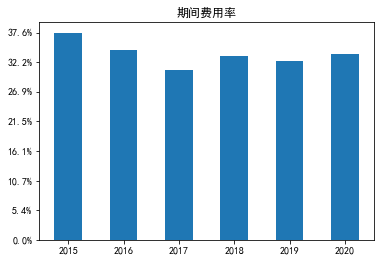

In [9]:
analysis.show_plot('t3')

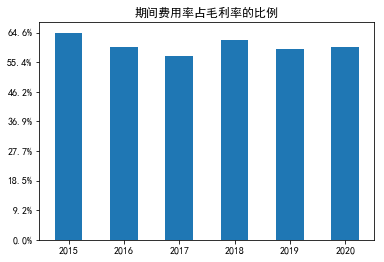

In [10]:
analysis.show_plot('t3', image_index=1)

### 销售费用率

In [11]:
t4 = analysis.init_table('t4')
t4['销售费用率'] = t4['销售费用(元)'] / t4['其中：营业收入(元)']

analysis.format_show_table('t4')

,2015,2016,2017,2018,2019,2020
销售费用(元),"1,353,472,800","1,545,113,300","1,677,876,500","1,909,856,800","1,928,259,200","2,146,965,000"
其中：营业收入(元),"4,542,718,028","5,794,897,867","7,017,397,058","7,424,885,274","7,760,581,856","8,128,620,799"
销售费用率,29.79%,26.66%,23.91%,25.72%,24.85%,26.41%


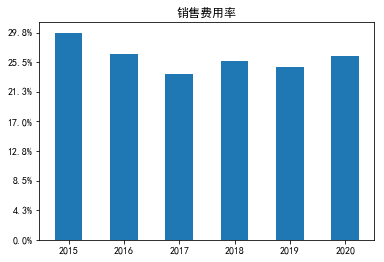

In [12]:
analysis.show_plot('t4')

### 主营利润率

In [13]:
t5 = analysis.init_table('t5')
t5['四费合计'] = t3['四费合计']
t5['主营利润'] = t5['其中：营业收入(元)'] - t5.T[1:4].sum()
t5['主营利润率'] = t5['主营利润'] / t5['其中：营业收入(元)']
t5['主营利润占营业利润的比率'] = t5['主营利润'] / t5['三、营业利润(元)']

analysis.format_show_table('t5')

,2015,2016,2017,2018,2019,2020
其中：营业收入(元),"4,542,718,028","5,794,897,867","7,017,397,058","7,424,885,274","7,760,581,856","8,128,620,799"
其中：营业成本(元),"1,899,998,300","2,474,046,300","3,250,587,700","3,450,765,200","3,548,777,700","3,563,206,900"
营业税金及附加(元),"46,546,200","67,524,300","66,643,000","70,571,400","66,618,100","61,956,600"
四费合计,"1,707,741,600","1,994,272,600","2,158,838,100","2,475,639,100","2,512,092,400","2,747,298,400"
主营利润,"888,431,928","1,259,054,667","1,541,328,258","1,427,909,574","1,633,093,656","1,756,158,899"
主营利润率,19.56%,21.73%,21.96%,19.23%,21.04%,21.60%
三、营业利润(元),"953,027,986","1,334,633,128","1,690,032,921","1,701,556,037","1,871,755,798","1,951,474,414"
主营利润占营业利润的比率,93.22%,94.34%,91.20%,83.92%,87.25%,89.99%


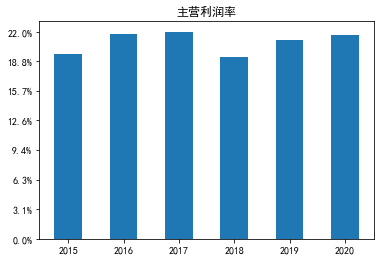

In [14]:
analysis.show_plot('t5')

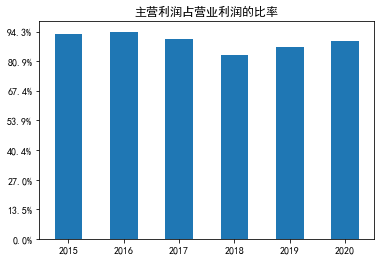

In [15]:
analysis.show_plot('t5', image_index=1)

### 营业外收入净额

In [16]:
t6 = analysis.init_table('t6')
t6['营业外收入净额'] = t6['加：营业外收入(元)'] - t6['减：营业外支出(元)']
t6['营业外收入净额占利润总额的比率'] = t6['营业外收入净额'] / t6['四、利润总额(元)']

analysis.format_show_table('t6')

,2015,2016,2017,2018,2019,2020
加：营业外收入(元),"17,323,700","70,955,800","4,101,300","2,375,700","4,098,200","1,084,400"
减：营业外支出(元),"1,542,100","1,329,900","1,459,600","1,607,100","4,323,600","3,953,200"
营业外收入净额,"15,781,600","69,625,900","2,641,700","768,600","-225,400","-2,868,800"
四、利润总额(元),"968,809,600","1,404,259,100","1,692,674,700","1,702,324,700","1,871,530,500","1,948,605,500"
营业外收入净额占利润总额的比率,1.63%,4.96%,0.16%,0.05%,-0.01%,-0.15%


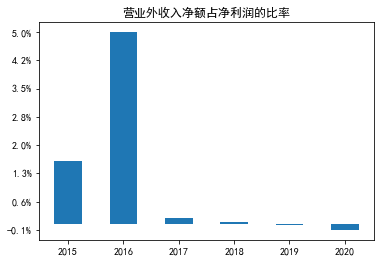

In [17]:
analysis.show_plot('t6')

### 归母净利润及增速

In [18]:
t7 = analysis.init_table('t7')
t7['归属于母公司所有者的净利润增长率'] = t7.pct_change()

analysis.format_show_table('t7')

,2015,2016,2017,2018,2019,2020
归属于母公司所有者的净利润(元),"830,491,200","1,206,833,900","1,461,213,500","1,473,579,700","1,589,814,800","1,660,750,000"
归属于母公司所有者的净利润增长率,nan%,45.32%,21.08%,0.85%,7.89%,4.46%


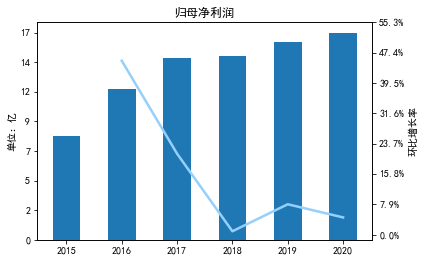

In [19]:
analysis.show_plot('t7')

### 输出分析报告

In [20]:
ReportDocument(analysis).save()